In [3]:
import pandas as pd
import numpy as np


In [4]:
file_path ='C:\\Users\\Dell\\Desktop\\Sentiment Analysis\\all-data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # another option from chatgpt encoding='cp1252'




In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
print(df.columns)


Index(['neutral', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'], dtype='object')


In [7]:
filename = r"C:\Users\Dell\Desktop\Sentiment Analysis\all-data.csv"
df = pd.read_csv(filename, 
                 names=["sentiment", "text"],
                 encoding="ISO-8859-1", encoding_errors="replace")


In [8]:
import nltk
#commenting them because i already downloaded in other notebook
#nltk.download('omw-1.4')
#nltk.download('wordnet')
#nltk.download('stopwords')


In [9]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


filename = r"C:\Users\Dell\Desktop\Sentiment Analysis\all-data.csv"

# Reading dataset
df = pd.read_csv(filename, 
                 names=["sentiment", "text"],
                 encoding="ISO-8859-1", encoding_errors="replace")

# lemmatization and stopwords, basic nlp stuff
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# preprocessing the text, again nlp stuff
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Removing non-word characters
    text = text.lower()  # Converting to lowercase
    words = text.split()  # Spliting into words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(words)

# Applying the preprocess_text function to the 'text' column (because we need clean text)
df['cleaned_text'] = df['text'].apply(preprocess_text)

# using df to display first 5 rows of the cleaned text
print(df['cleaned_text'].head())


0    according gran company plan move production ru...
1    technopolis plan develop stage area le 100 000...
2    international electronic industry company elco...
3    new production plant company would increase ca...
4    according company updated strategy year 2009 2...
Name: cleaned_text, dtype: object


In [10]:
#using tdif to lable the sentiments as 0,1 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['sentiment']  # Sentiment labels (0 for negative, 1 for positive, etc.)


In [11]:
#spliting the data into different tests (the test size and all is taken from chatgpt)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
#training via naive bayes algo as the second test algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)



MultinomialNB()

In [14]:
#evaluation of model: some predictions and evaluation to check accuracy(i don't understand terms enough to explain in meeting)
# todo: check everyword meaning to explain, brush up some theory


# model.predict(X_test): This uses the trained Logistic Regression model to predict sentiment labels for the test data.
#accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred), and classification_report(y_test, y_pred):
#These functions evaluate the performance of the model on the test set by calculating accuracy, displaying a confusion matrix,
#and providing precision, recall, and F1-scores.

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}')
print('Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_nb))
print('Naive Bayes Classification Report:')
print(classification_report(y_test, y_pred_nb))



Naive Bayes Accuracy: 0.688659793814433
Naive Bayes Confusion Matrix:
[[  9  57  44]
 [  0 548  23]
 [  0 178 111]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.08      0.15       110
     neutral       0.70      0.96      0.81       571
    positive       0.62      0.38      0.48       289

    accuracy                           0.69       970
   macro avg       0.77      0.48      0.48       970
weighted avg       0.71      0.69      0.64       970



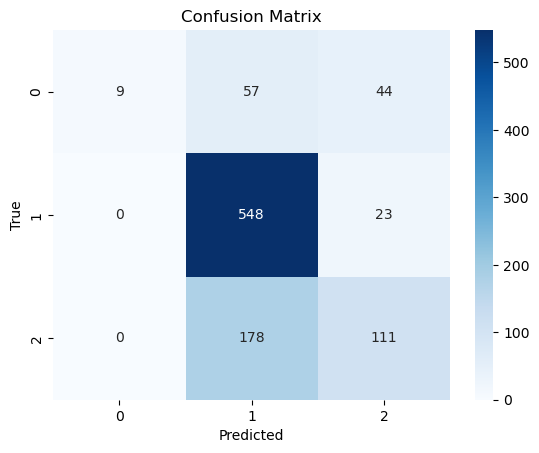

In [16]:
#some visualization from chatgpt, because why not
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [17]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import joblib

# Example training data (replace with your actual training data and labels)
X_train = ["Sample text data for training.", "Another example sentence.", "More training data here."]
y_train = [1, 0, 1]  # Example labels (e.g., 1 for positive sentiment, 0 for negative)

# Initialize and fit TF-IDF Vectorizer on the training data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

# Initialize and train models (replace with your actual trained models)


nb_model = MultinomialNB()
nb_model.fit(X_train_transformed, y_train)



# Save the vectorizer and models (optional, for later use)
# joblib.dump(vectorizer, 'vectorizer.pkl')
# joblib.dump(logistic_model, 'logistic_model.pkl')
# joblib.dump(nb_model, 'nb_model.pkl')
# joblib.dump(svm_model, 'svm_model.pkl')

def preprocess_text(text):
    # Basic preprocessing function (customize as needed)
    text = text.lower()
    return text

def predict_sentiment(text):
    # Preprocess the text
    processed_text = preprocess_text(text)
    
    # Transform the text into TF-IDF features
    X_new = vectorizer.transform([processed_text])
    
    # Predict sentiment using the models
    nb_prediction = nb_model.predict(X_new)[0]
    
    # Print the results
    print(f"Input Text: {text}")
    print(f"Naive Bayes Prediction: {nb_prediction}")

# Input text from the user
user_input = input("Enter the text for sentiment analysis: ")
predict_sentiment(user_input)



Enter the text for sentiment analysis: The stock market saw significant gains today as tech companies reported strong earnings.
Input Text: The stock market saw significant gains today as tech companies reported strong earnings.
Naive Bayes Prediction: 1
